In [1]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [2]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    e = numpy.abs(f-F)
    r = e/numpy.abs(f)
    p = numpy.floor(-numpy.log10(r/5.)).astype(int)
    
    return e, r, p


In [3]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [4]:
print(errors(numpy.pi, 22/7))
print(errors(numpy.pi, 355/113))

(0.0012644892673496777, 0.0004024994347707008, 4)
(2.667641894049666e-07, 8.49136787674061e-08, 7)


$\frac{355}{113}$ is more accurate as it has $7$ digits of decimal precision. 

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [5]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    best = [0, 0, numpy.inf] # m, n, error
    for n in range(10**(d-1), 10**d):
        for m in range(int(numpy.floor(n * numpy.pi)), int(numpy.ceil(n * numpy.pi)+1)):
            if m < 10**d:
                e, r, p = errors(numpy.pi, m/n)
                if e < best[2]:
                    best = [m, n, e]
    
    return best[0], best[1]

In [6]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

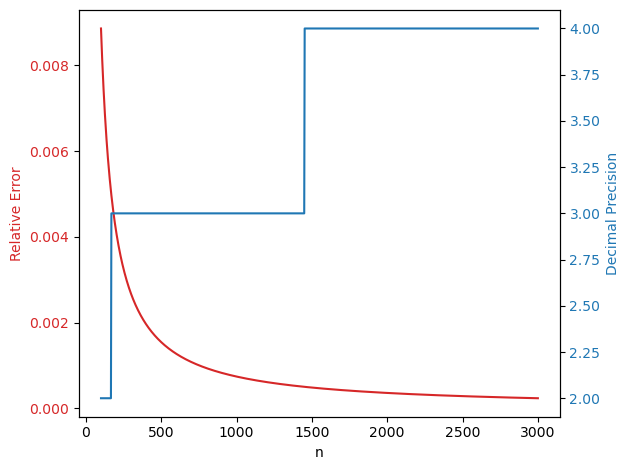

In [7]:
n = numpy.linspace(100, 3000, 1000, dtype=int).astype(int)
f = [numpy.sum([numpy.log(i) for i in range(1, j+1)]) for j in n]
F = n*numpy.log(n) - n
e, r, p = errors(f, F)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot(n, r, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Decimal Precision', color=color) 
ax2.plot(n, p, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

In [8]:
n_4 = n[numpy.where(p == 4)[0][0]]
print(n_4)

print(errors(numpy.sum([numpy.log(i) for i in range(1, n_4+1)]), n_4*numpy.log(n_4) - n_4)[2])

n_4 -= 1
print(errors(numpy.sum([numpy.log(i) for i in range(1, n_4+1)]), n_4*numpy.log(n_4) - n_4)[2])

1452
4
3


We need $n$ to be at least $1452$ to reach $4$ decimal places of precision. 

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


\begin{align*}
\frac{1}{1-\Delta x} + \cosh \Delta x &= 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6) \\ 
&= 2 + \Delta x + \frac{3 \Delta x^2}{2} + \Delta x^3 + \frac{\Delta x^4}{24} + O(\Delta x^6)
\end{align*}

\begin{align*}
\frac{1}{1-\Delta x} \times \cosh \Delta x &= 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) + \frac{\Delta x^2}{2!} + \frac{\Delta x^3}{2!} + \frac{\Delta x^4}{2!} + \frac{\Delta x^5}{2!} + O(\Delta x^6) + \frac{\Delta x^4}{4!} + \frac{\Delta x^5}{4!} + \frac{\Delta x^6}{4!} + \frac{\Delta x^7}{4!} + O(\Delta x^8) + O(\Delta x^{10})\\ 
&= 1 + \Delta x + \frac{3}{2} \Delta x^2 + \frac{3}{2} \Delta x^3 + \frac{13}{24} \Delta x^4 + \frac{13}{24} \Delta x^5 + \frac{1}{24} \Delta x^6 + \frac{1}{24} \Delta x^7 + O(\Delta x^{10})
\end{align*}

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

Using the remainder from the Taylor's expansion, 
\begin{align*}
|e^x - T_n(x)| = \left|\frac{e^c x^{n+1}}{(n+1)!}\right|, 
\end{align*}
where $c$ is between $x_0$ and $x$. Thus, in this case, 
\begin{align*}
r_n &= \frac{|\frac{e^c x^{n+1}}{(n+1)!}|}{|e^x|} \\ 
&= \frac{|e^c|}{|e^x|} \cdot \left|\frac{x^{n+1}}{(n+1)!}\right|. 
\end{align*}
Due to the constraint on $c$, 
\begin{align*}
\frac{|e^c|}{|e^x|} \leq 1. 
\end{align*}
Thus, 
\begin{align*}
r_n \leq \left|\frac{x^{n+1}}{(n+1)!}\right|. 
\end{align*}

**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

Using the above result, we want to let $r_n \leq \epsilon_{machine}$, 
\begin{align*}
\left| \frac{x^{n+1}}{(n+1)!} \right| &\leq \epsilon_{machine} \\ 
(n+1) \log(x) - \log((n+1)!) &\leq \log(\epsilon_{machine}) \\ 
(n+1) \log(x) - ((n+1) \log(n+1) - (n+1)) &\leq \log(\epsilon_{machine}) \\ 
(n+1)(\log(x) - \log(n+1) + 1) &\leq \log(\epsilon_{machine}). 
\end{align*}
Since $\epsilon_{machine}$ is really close to zero, $\log(\epsilon_{machine})$ tends to $-\infty$. While $(n+1)$ is positive, to satisfy the inequality, $\log(x) - \log(n+1) + 1$ has to be negative. 
\begin{align*}
\log(x) - \log(n+1) + 1 &< 0 \\ 
\log(\frac{x}{n+1}) + 1 &< 0 \\ 
\log(\frac{x}{n+1}) &< -1 \\ 
\frac{x}{n+1} &< e^{-1} \\ 
x &< (n+1) e^{-1} \\ 
e \cdot x &< n + 1. 
\end{align*}
As $x$ and $n$ are both large, we can ignore the plus $1$. Thus, we need approximately $n > e \cdot x$. 

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [9]:
def Tn_exp(x):
    """ 
    Approximates the exponential function exp(x) using a truncated series expansion.
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
            
    Returns:
    --------
        Tn: float
            The approximate value of exp(x).
        MAX_N: int
            The number of terms used in the Taylor series expansion.
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    if x < 0:
        xsign = -1
        x = -x
    else:
        xsign = 1
    
    if x <= 98:
        MAX_N = 1
        while numpy.abs(x**(MAX_N+1)/factorial(MAX_N+1)) >= 8 * numpy.finfo(float).eps:
            MAX_N += 1
    else:
        MAX_N = numpy.ceil(numpy.exp(1) * x).astype(int)
    
    if MAX_N > 1: 
        approx = 1 + x/(MAX_N - 1)
    else:
        approx = 1
        
    for n in reversed(range(1, MAX_N - 1)):
        approx = approx * x/n + 1
        
    if xsign == -1:
        Tn = 1/approx
    else:
        Tn = approx

        
    return Tn, MAX_N

In [10]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.756993199803329 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [11]:
Tn, MAX_N = Tn_exp(709.)
print(errors(numpy.exp(709), Tn))
print(errors(numpy.exp(709), numpy.exp(1)**709))

(2.0956323250114558e+293, 2.5499250734581486e-15, 15)
(3.1035316813264893e+294, 3.77631760878802e-14, 14)


Since `numpy.exp(1)` is not giving exact value of $e$, the large power of it will incur large error. 
\begin{align*}
(E (1 + \delta))^{709} = E^{709} \times (1 + 709 \delta + \cdots + \delta^{709}), 
\end{align*}
where $E$ is the python approximation for $e$. 

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [12]:
def Tn_exp(x, tolerance):
    """ 
    Approximates the exponential function exp(x) using a truncated series expansion.
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
        tolerance: float
            maximum relative error allowed in the approximation
            
    Returns:
    --------
        Tn: float
            The approximate value of exp(x).
        MAX_N: int
            The number of terms used in the Taylor series expansion.
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    if x < 0:
        xsign = -1
        x = -x
    else:
        xsign = 1
    
    if x <= 98:
        MAX_N = 1
        while numpy.abs(x**(MAX_N+1)/factorial(MAX_N+1)) >= tolerance:
            MAX_N += 1
    else:
        MAX_N = numpy.ceil(numpy.exp(1) * x).astype(int)
        
    if MAX_N > 1: 
        approx = 1 + x/(MAX_N - 1)
    else:
        approx = 1
        
    for n in reversed(range(1, MAX_N - 1)):
        approx = approx * x/n + 1
        
    if xsign == -1:
        Tn = 1/approx
    else:
        Tn = approx

        
    return Tn, MAX_N

In [13]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 14.198921216203827 eps_machine
Success!


C:\Users\31040\AppData\Local\Temp\ipykernel_54188\1224257488.py:32: RuntimeWarning: overflow encountered in scalar power
  while numpy.abs(x**(MAX_N+1)/factorial(MAX_N+1)) >= tolerance:
C:\Users\31040\AppData\Local\Temp\ipykernel_54188\1224257488.py:32: RuntimeWarning: invalid value encountered in scalar divide
  while numpy.abs(x**(MAX_N+1)/factorial(MAX_N+1)) >= tolerance:


## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

sign: $2$ 
$d_1$: $3$ 
$d_2$: $4$ 
$d_3$: $4$ 
E: $7$
zero: $1$ 

In total, we have 
\begin{align*}
2 \times 3 \times 4 \times 4 \times 7 + 1 = 673
\end{align*}
numbers that can be represented. The underflow limit is 
\begin{align*}
1.0 \times 4^{-3} = 0.015625. 
\end{align*}
The overflow limit is 
\begin{align*}
3.33 \times 4^{3} = 213.12. 
\end{align*}
Machine epsilon will be 
\begin{align*}
4^{-2} = 0.0625. 
\end{align*}

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

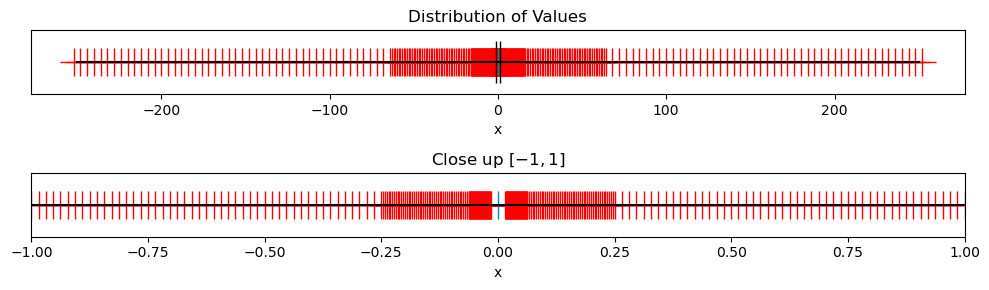

In [14]:
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [3, 2, 1, 0, -1, -2, -3]

fig = plt.figure(figsize=(10.0, 3.0))
axes = fig.add_subplot(2, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '|', markersize=20)
axes.plot([-1., 1.], [0.0, 0.0], 'k|', markersize=30)

axes.plot([-250.0, 250.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")

axes = fig.add_subplot(2,1,2)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25 + d3 * 0.0625) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Close up $[-1, 1]$")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-1, 1])
fig.tight_layout(h_pad=1, w_pad=5)

plt.show()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

\begin{align*}
(2 \times 3 \times 4 \times 4 \times 7 + 1) - (2 \times 1 \times 2 \times 2 \times 7 + 1) = 616
\end{align*}
We can store $616$ more numbers in base $4$ than base $2$. 